In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("../src/accelerometer.csv")
df.head(5)

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


In [4]:
X1  = df['x'].values
X2 = df['y'].values
X3 = df['z'].values
y = df['wconfid'].values
P = df['pctid'].values

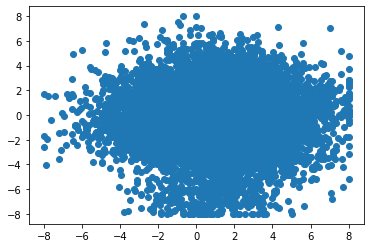

In [5]:
plt.scatter(X1,X2)

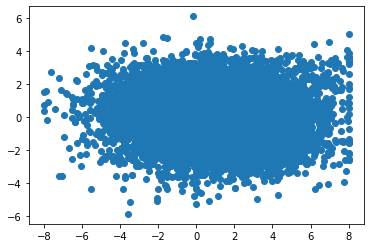

In [6]:
plt.scatter(X1,X3)

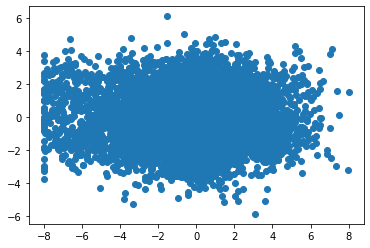

In [7]:
plt.scatter(X2,X3)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = df.iloc[:,1:len(df.columns)].values
X

array([[ 2.000e+01,  1.004e+00,  9.000e-02, -1.250e-01],
       [ 2.000e+01,  1.004e+00, -4.300e-02, -1.250e-01],
       [ 2.000e+01,  9.690e-01,  9.000e-02, -1.210e-01],
       ...,
       [ 1.000e+02,  1.156e+00, -9.400e-02, -2.270e-01],
       [ 1.000e+02,  9.340e-01,  2.030e-01, -1.720e-01],
       [ 1.000e+02,  1.199e+00, -1.760e-01,  1.090e-01]])

In [9]:
PC = pca.fit_transform(X)
len(PC)

153000

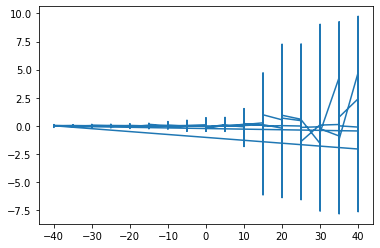

In [10]:
plt.plot(PC[:,0],PC[:,1])

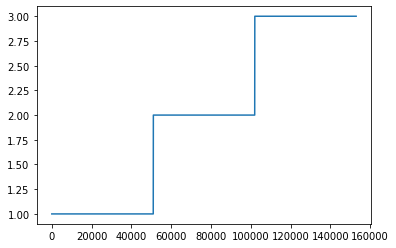

In [11]:
N = [n for n in range(0,len(y))]
plt.plot(y)

In [12]:
clr = {
    1:'r',
    2:'g',
    3:'b'
}

In [ ]:
# for i in range(0,len(y)):
#     plt.scatter(PC[0],PC[1],color=clr[y[i]])

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = df.iloc[:,1:len(df.columns)]
X =  X.drop(['pctid'], axis=1).values
X

array([[ 1.004,  0.09 , -0.125],
       [ 1.004, -0.043, -0.125],
       [ 0.969,  0.09 , -0.121],
       ...,
       [ 1.156, -0.094, -0.227],
       [ 0.934,  0.203, -0.172],
       [ 1.199, -0.176,  0.109]])

Text(0, 0.5, 'PC2 (38.69) %')

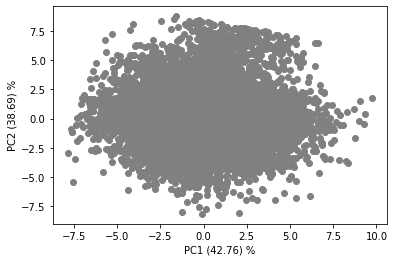

In [15]:
PC = pca.fit_transform(X)
plt.scatter(PC[:,0],PC[:,1],color="gray")
plt.xlabel("PC1 (%.2f) %%" % (100*pca.explained_variance_ratio_[0]))
plt.ylabel("PC2 (%.2f) %%" % (100*pca.explained_variance_ratio_[1]))

In [67]:
# for i in range(0,len(y)):
#     plt.scatter(PC[0],PC[1],color=clr[y[i]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
clf = svm.SVC(kernel="gaussian")
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
X

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cm)